<a href="https://colab.research.google.com/github/CAMI2-bit/Ecuaciones-diferenciales-parciales/blob/main/Metodo_Galerkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Metodo Galerkin

In [6]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [7]:
x = sp.symbols('x') #introducimos una variable
u = sp.Function('u') #introducimos una funcion

In [8]:
ode= u(x).diff(x,x) +u(x)+x # está estructura es un diccionario
sp.dsolve(ode,u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) - x)

In [14]:
a, b = sp.symbols('a b')

u_2 = a*x*(1-x) + b*x**2*(1-x)

In [15]:
u_2

a*x*(1 - x) + b*x**2*(1 - x)

Definimos el residuo (error) E

In [26]:
u_2_d_2 = sp.diff(u_2, x, 2)

E = u_2_d_2 + u_2

In [27]:
E

a*x*(1 - x) + b*x**2*(1 - x) + x - 2*(a + 2*b*x + b*(x - 1))

In [28]:
E.simplify()

-a*x*(x - 1) - 2*a - b*x**2*(x - 1) - 4*b*x - 2*b*(x - 1) + x

ss

In [29]:
I_1 = sp.integrate(E*x*(1-x), (x, 0, 1))
I_2 = sp.integrate(E*x**2*(1-x), (x, 0, 1))

In [30]:
I_1

-3*a/10 - 3*b/20 + 1/12

In [31]:
I_2

-3*a/20 - 13*b/105 + 1/20

In [32]:
soleq = sp.solve([I_1, I_2], [a, b], simplify=True) #para igualar a 0
soleq

{a: 71/369, b: 7/41}

In [33]:
u_approx = u_2.subs(soleq)
u_approx

7*x**2*(1 - x)/41 + 71*x*(1 - x)/369

In [34]:
u_approx_fn = sp.lambdify(x, u_approx, 'numpy')

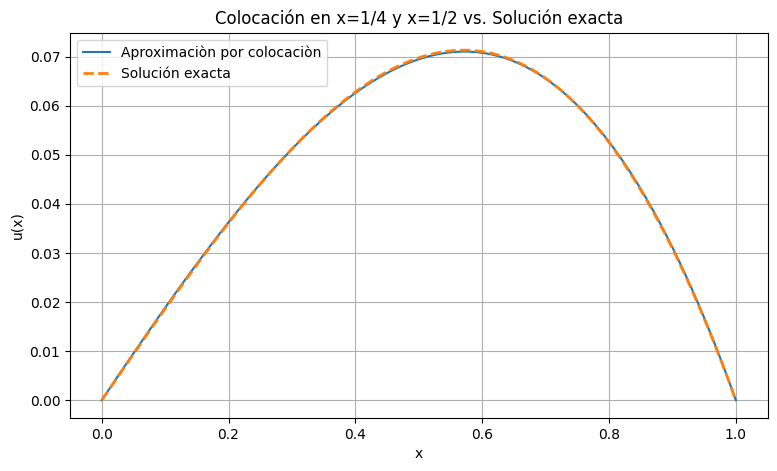

In [38]:
xx=np.linspace(0,1,100)

# Define the symbolic exact solution with boundary conditions u(0)=0, u(1)=0
u_exact_sym = (1/sp.sin(1))*sp.sin(x) - x

# Lambdify the exact solution for numerical evaluation
u_exact_fn = sp.lambdify(x, u_exact_sym, 'numpy')

# Calculate the y-values for the exact solution
yy = u_exact_fn(xx)

plt.figure(figsize=(9,5))
plt.plot(xx,u_approx_fn(xx),label="Aproximaciòn por colocaciòn")
plt.plot(xx, yy, "--", label="Solución exacta",linewidth=2)  # Fixed syntax and used defined yy


plt.title("Colocación en x=1/4 y x=1/2 vs. Solución exacta")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()